In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\parth\Downloads\archive (7)\SP 500 ESG Risk Ratings.csv")

In [6]:
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [8]:
data.columns

Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')

In [61]:
data.isnull().sum()

Symbol                     0
Name                       0
Address                    0
Sector                     0
Industry                   0
Full Time Employees        0
Description                0
Total ESG Risk score       0
Environment Risk Score     0
Governance Risk Score      0
Social Risk Score          0
Controversy Level          0
Controversy Score         26
ESG Risk Percentile        0
ESG Risk Level             0
dtype: int64

In [57]:
data = data.dropna(subset=['Total ESG Risk score','Full Time Employees'])

In [64]:
data.shape

(426, 15)

Average ESG Score by Sector

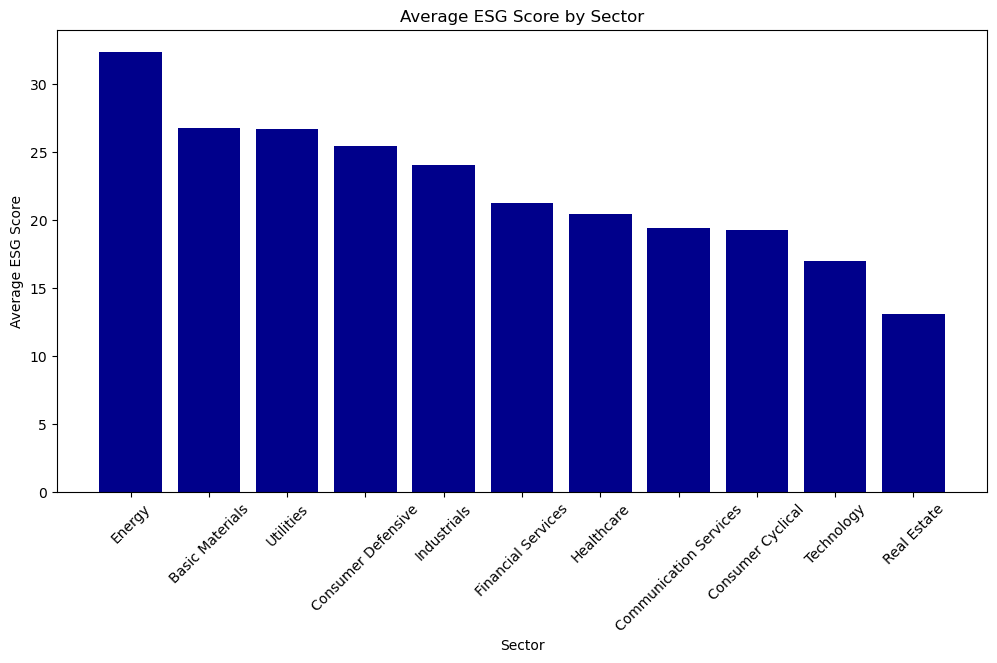

In [150]:
avg_esg_score_by_sector = data.groupby('Sector')['Total ESG Risk score'].mean().reset_index()
avg_esg_score_by_sector = avg_esg_score_by_sector.sort_values(by='Total ESG Risk score',ascending=False)
plt.figure(figsize=(12,6))
plt.bar(avg_esg_score_by_sector['Sector'],avg_esg_score_by_sector['Total ESG Risk score'],color='Darkblue')
plt.xlabel('Sector')
plt.ylabel('Average ESG Score')
plt.title('Average ESG Score by Sector')
plt.xticks(rotation=45)
plt.show()

Companies in the Energy Sector have highest average ESG Score, followed by Basic Materials, and Utilities. Whereas, Real Estate and Technology Sectors are at the lowest.

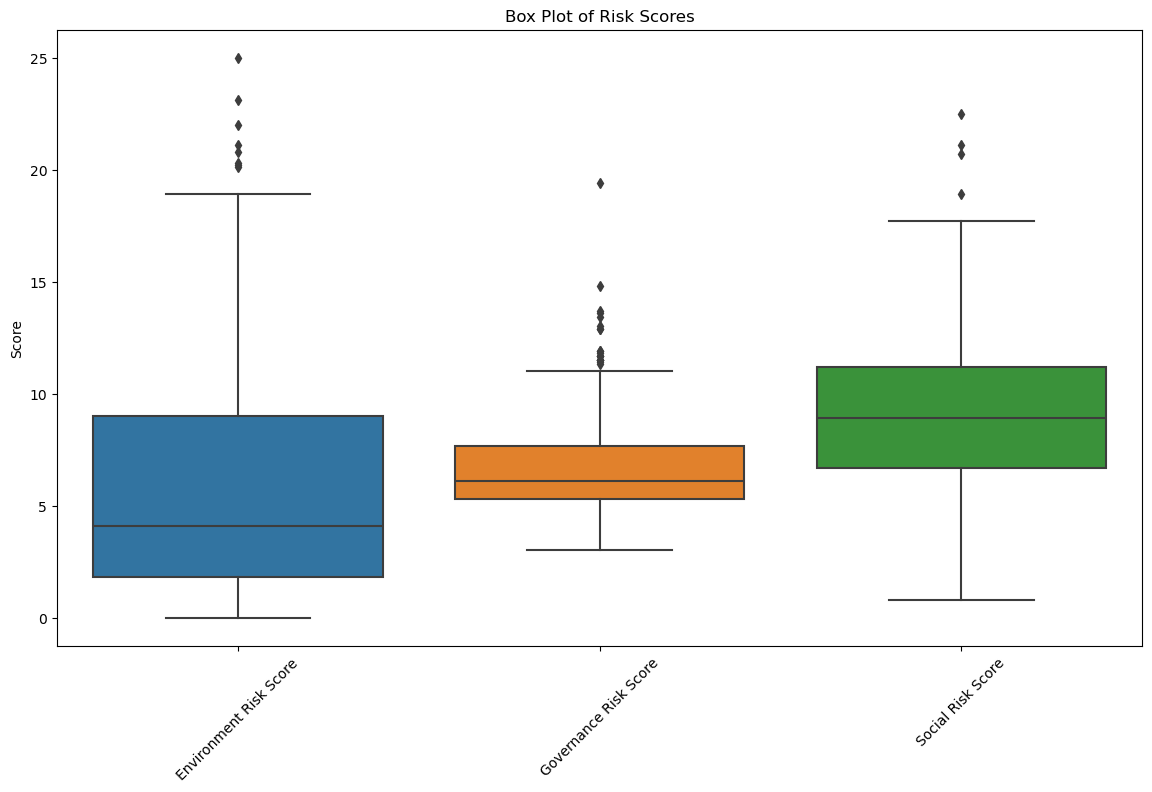

In [131]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']])
plt.title('Box Plot of Risk Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

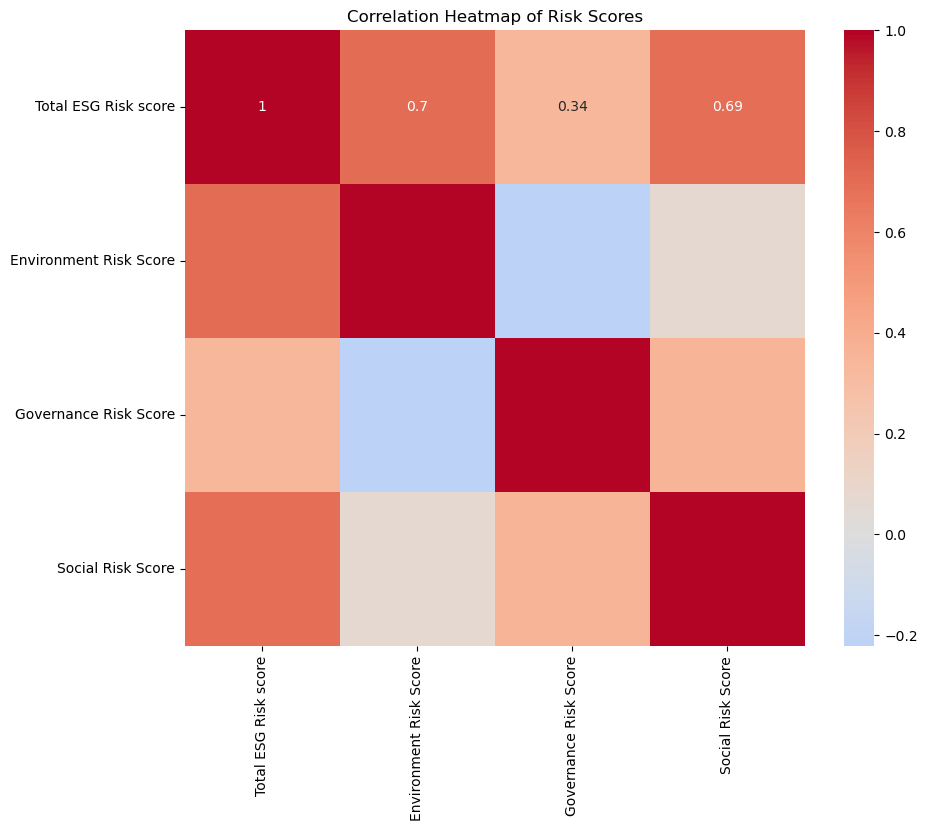

In [133]:
corr = data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Risk Scores')
plt.show()

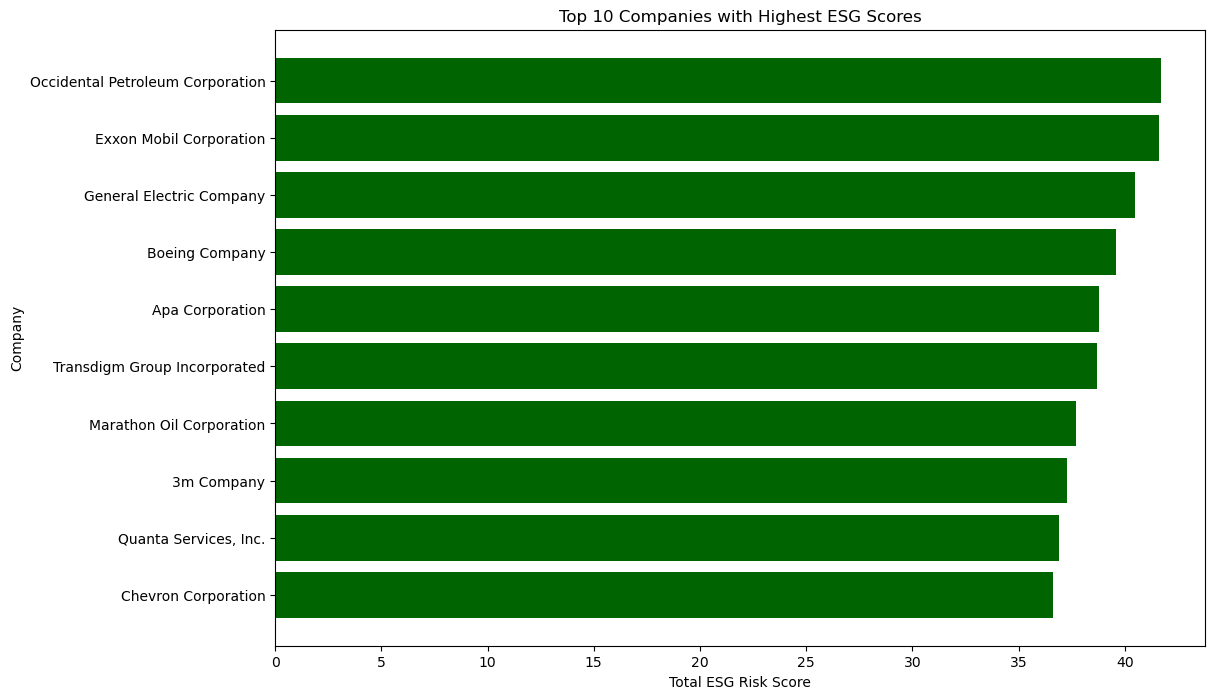

In [183]:
top_10_esg  = data.nlargest(10,'Total ESG Risk score')
top_10_esg = top_10_esg.sort_values(['Total ESG Risk score'],ascending=True)
plt.figure(figsize=(12,8))
plt.barh(top_10_esg['Name'],top_10_esg['Total ESG Risk score'],color='DarkGreen')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Company')
plt.title('Top 10 Companies with Highest ESG Scores')
plt.show()

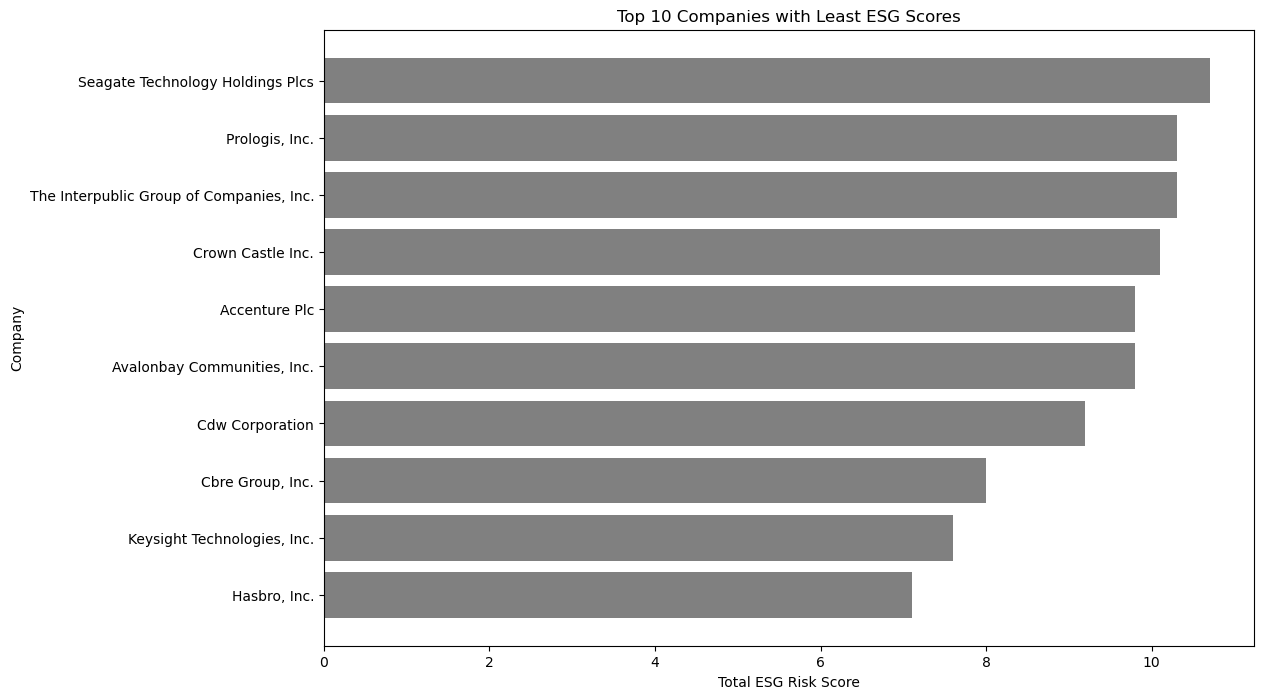

In [181]:
top_10_esg  = data.nsmallest(10,'Total ESG Risk score')
top_10_esg = top_10_esg.sort_values(['Total ESG Risk score'],ascending=True)
plt.figure(figsize=(12,8))
plt.barh(top_10_esg['Name'],top_10_esg['Total ESG Risk score'],color='Grey')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Company')
plt.title('Top 10 Companies with Least ESG Scores')
plt.show()